In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
dataset = pd.read_csv('Datasets/feature_dataset.csv')

dataset = dataset.reset_index()

col_names = [ 
    "Home Team ELO", "Away Team ELO", "Home XG", "Away XG", 
    "Home XGA", "Away XGA", "Home Win Percentage", "Home Draw Percentage", 
    "Away Win Percentage", "Away Draw Percentage", "Head2Head Win", 
    "Head2Head Draw", "Winner"
]

dataset = dataset[col_names]
dataset.head()

,Home Team ELO,Away Team ELO,Home XG,Away XG,Home XGA,Away XGA,Home Win Percentage,Home Draw Percentage,Away Win Percentage,Away Draw Percentage,Head2Head Win,Head2Head Draw,Winner
0,1676,1521,54.21,33.84,40.90,55.94,64.50,20.64,29.82,28.95,0,0,-1
1,1485,1520,38.63,37.45,53.75,51.46,24.01,26.97,26.52,25.10,0,0,0
2,1462,1692,48.21,44.89,56.39,46.18,27.27,29.22,36.44,28.54,0,0,0
3,1509,1680,46.69,57.40,52.39,57.04,32.51,25.29,39.62,25.83,0,0,-1
4,1420,1434,45.73,65.26,32.79,46.99,30.42,24.58,21.05,26.32,0,0,-1


Accuracy: 0.5511695906432749

Feature Weights for Logistic Regression:
Home Team ELO: 0.0001385501121100456
Away Team ELO: -3.0505678459229092e-05
Home XG: -0.015643855780479967
Away XG: 0.014160678857450702
Home XGA: 0.020595847101626305
Away XGA: -0.016489456922104177
Home Win Percentage: -0.015761656889707612
Home Draw Percentage: 0.00757312995843922
Away Win Percentage: 0.0015856654004028708
Away Draw Percentage: -0.007996436492259744
Head2Head Win: 0.004994924155893635
Head2Head Draw: -0.0024827419443189413


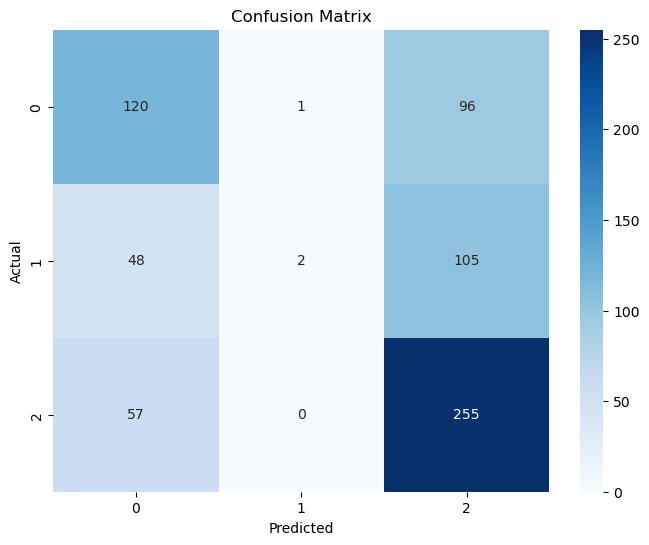

In [42]:
X = dataset.drop('Winner', axis=1)
y = dataset['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression(random_state=16, max_iter=10000, solver='saga')

logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

feature_weights = logistic_regression_model.coef_[0]
features = X.columns


print("\nFeature Weights for Logistic Regression:")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM Accuracy: 0.5511695906432749

Feature Weights for SVM (Linear Kernel):
Home Team ELO: -4.707010820302e-05
Away Team ELO: -1.346747899534348e-05
Home XG: -0.0086422198950245
Away XG: 0.00792535859734449
Home XGA: 0.01223059220134866
Away XGA: -0.010757700935911732
Home Win Percentage: -0.00788606986298224
Home Draw Percentage: 0.0022790965781496293
Away Win Percentage: 0.001064273509123292
Away Draw Percentage: -0.0068895157922079535
Head2Head Win: 0.0027898139789464204
Head2Head Draw: -0.0015585165704918


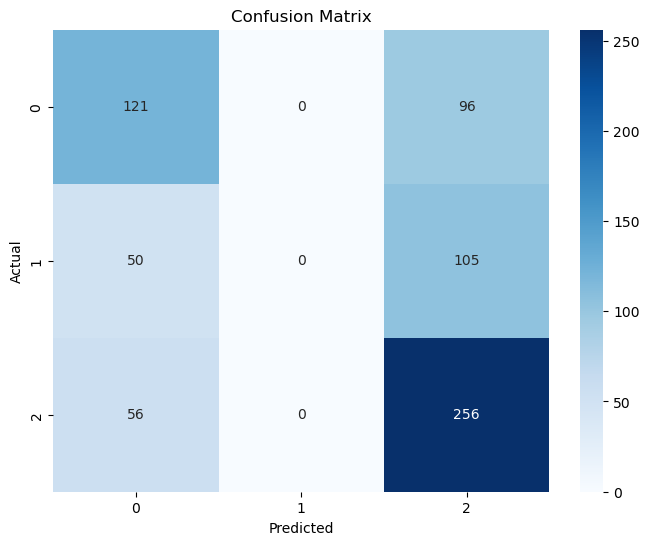

In [43]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Linear SVM model
svm_model = LinearSVC(random_state=16, max_iter=10000)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', accuracy_svm)

# Get feature weights from Linear SVM
feature_weights = svm_model.coef_[0]
features = X.columns

print("\nFeature Weights for SVM (Linear Kernel):")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Accuracy: 0.5921052631578947

Feature Importances:
                 Feature  Importance
4               Home XGA    0.145565
2                Home XG    0.125139
3                Away XG    0.120798
8    Away Win Percentage    0.114770
1          Away Team ELO    0.104954
9   Away Draw Percentage    0.072539
6    Home Win Percentage    0.072519
7   Home Draw Percentage    0.062132
5               Away XGA    0.057877
0          Home Team ELO    0.052072
11        Head2Head Draw    0.038281
10         Head2Head Win    0.033354


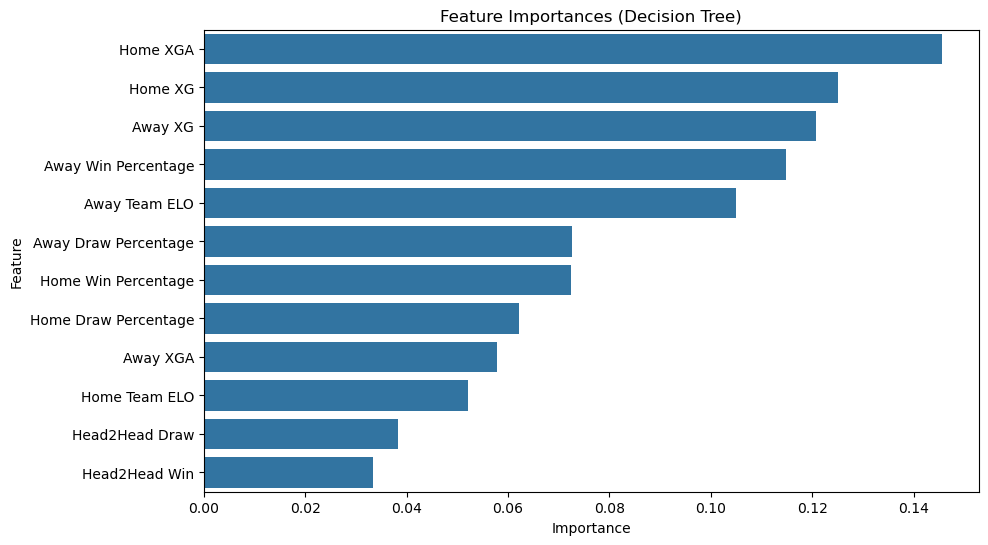

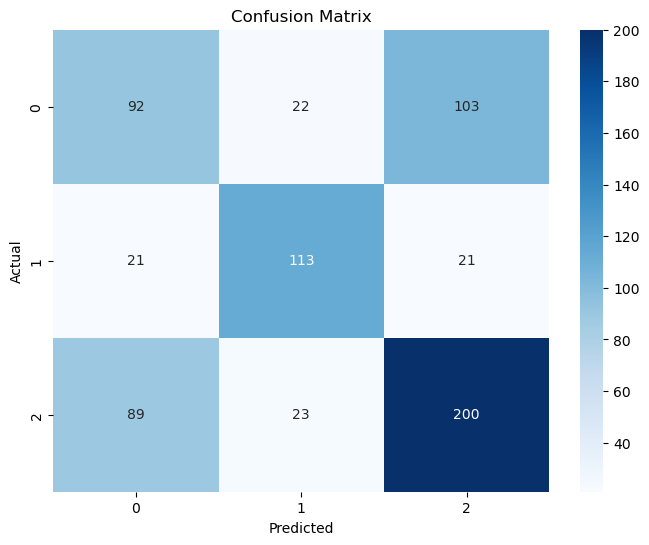

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=16)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy_dt)

# Get feature importances
feature_importances = decision_tree_model.feature_importances_
features = X.columns

# Display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Decision Tree)')
plt.show()

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.6769005847953217

Random Forest Feature Importances:
                 Feature  Importance
3                Away XG    0.140881
4               Home XGA    0.138548
1          Away Team ELO    0.098149
0          Home Team ELO    0.087388
8    Away Win Percentage    0.086174
6    Home Win Percentage    0.083711
2                Home XG    0.081378
5               Away XGA    0.079000
9   Away Draw Percentage    0.066576
7   Home Draw Percentage    0.065427
10         Head2Head Win    0.037783
11        Head2Head Draw    0.034985


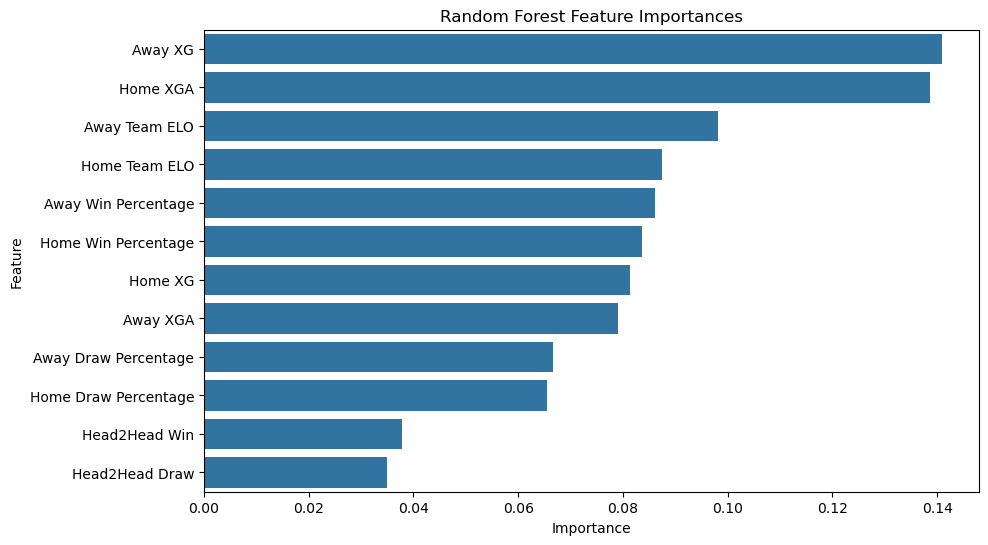

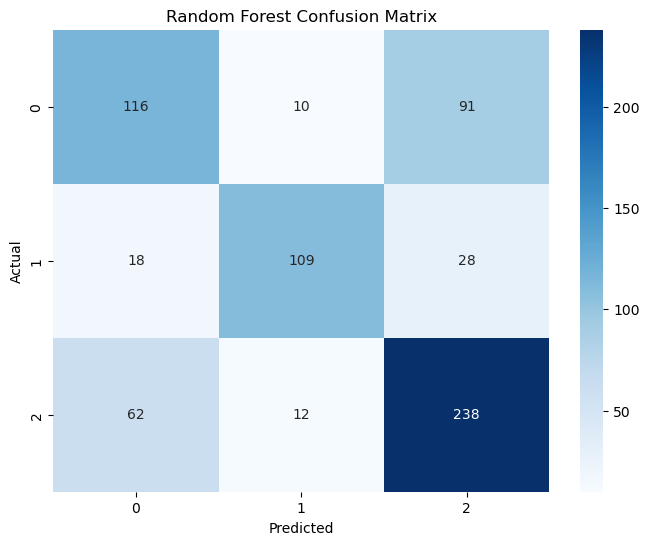

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=16, n_estimators=1000)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

# Get feature importances
feature_importances_rf = random_forest_model.feature_importances_
features = X.columns

# Display feature importances
importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(importance_df_rf)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Random Forest Feature Importances')
plt.show()

# Confusion matrix for Random Forest
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()